<a href="https://colab.research.google.com/github/dennkitotaichi/kouatu/blob/master/light_GBM_koukiatau_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#さっきの
place_codeA = [14, 21, 23, 31, 32, 33, 35]
place_codeB = [47412, 47423, 47430, 47575, 47582, 47584, 47588]
place_name = ["札幌", "室蘭", "函館", "青森", "秋田", "盛岡", "山形"]   

import requests
from bs4 import BeautifulSoup #ダウンロードしてなかったらpipでできるからやってね。
import csv

# URLで年と月ごとの設定ができるので%sで指定した英数字を埋め込めるようにします。
base_url = "http://www.data.jma.go.jp/obd/stats/etrn/view/daily_s1.php?prec_no=%s&block_no=%s&year=%s&month=%s&day=1&view=p1"

#取ったデータをfloat型に変えるやつ。(データが取れなかったとき気象庁は"/"を埋め込んでいるから0に変える)
def str2float(str):
  try:
    return float(str)
  except:
    return 0.0


if __name__ == "__main__":
  #都市を網羅します
  for place in place_name:
    #最終的にデータを集めるリスト (下に書いてある初期値は一行目。つまり、ヘッダー。)
    All_list = [['年月日', '陸の平均気圧(hPa)', '海の平均気圧(hPa)', '降水量(mm)', '平均気温(℃)', '平均湿度(%)', '平均風速(m/s)', '日照時間(h)']]
    print(place)
    index = place_name.index(place)
    # for文で2017年~2020年までの11回。
    for year in range(2017,2020):
      print(year)
      # その年の1月~12月の12回を網羅する。
      for month in range(1,13):
        #2つの都市コードと年と月を当てはめる。
        r = requests.get(base_url%(place_codeA[index], place_codeB[index], year, month))
        r.encoding = r.apparent_encoding

        # 対象である表をスクレイピング。
        soup = BeautifulSoup(r.text)
        rows = soup.findAll('tr',class_='mtx') #タグ指定してclass名を指定するみたい。

        # 表の最初の1~4行目はカラム情報なのでスライスする。(indexだから初めは0だよ)
        rows = rows[5:]

        # 1日〜最終日までの１行を網羅し、取得します。
        for row in rows:
          data = row.findAll('td')

          #１行の中には様々なデータがあるので全部取り出す。
          # ★ポイント
          rowData = [] #初期化
          rowData.append(str(year) + "/" + str(month) + "/" + str(data[0].string))
          rowData.append(str2float(data[1].string))
          rowData.append(str2float(data[2].string))
          rowData.append(str2float(data[3].string))
          rowData.append(str2float(data[6].string))
          rowData.append(str2float(data[9].string))
          rowData.append(str2float(data[11].string))
          rowData.append(str2float(data[16].string))

          #次の行にデータを追加
          All_list.append(rowData)

    #都市ごとにデータをファイルを新しく生成して書き出す。(csvファイル形式。名前は都市名)
    with open(place + '.csv', 'w') as file:
      writer = csv.writer(file, lineterminator='\n')
      writer.writerows(All_list)

札幌
2017
2018
2019
室蘭
2017
2018
2019
函館
2017
2018
2019
青森
2017
2018
2019
秋田
2017
2018
2019
盛岡
2017
2018
2019
山形
2017
2018
2019


In [0]:
import pandas as pd
A = All_list
#属性ちがうみたい
All_lists = pd.A
print(All_lists)

AttributeError: ignored

In [0]:
#さっきの(セルを新たに作ってやれば簡単)
place_codeA = [14, 21, 23, 31, 32, 33, 35]
place_codeB = [47412, 47423, 47430, 47575, 47582, 47584, 47588]
place_name = ["札幌", "室蘭", "函館", "青森", "秋田", "盛岡", "山形"]   

from google.colab import files

for place in place_name:
  files.download(place + '.csv')

In [9]:
from google.colab import files
uploaded = files.upload()

Saving datatotal3.csv to datatotal3.csv


In [10]:
import pandas as pd
dt = pd.read_csv('datatotal3.csv')
print(dt)

      Unnamed: 0  1    2  3  4    5  ...  52 53    54  55                56  57
0       2017/1/1  1 -2.0  8  1  1.6  ...   8  1   4.0   8    2017/1/1 12:28   8
1       2017/1/2  1  0.1  8  1  3.3  ...   8  1   7.0   8    2017/1/2 16:10   8
2       2017/1/3  0 -1.2  8  1  0.8  ...   8  1   7.3   8    2017/1/3 15:36   8
3       2017/1/4  0 -2.5  8  1 -0.6  ...   8  1   5.0   8    2017/1/4 20:10   8
4       2017/1/5  1 -4.1  8  1 -2.8  ...   8  1  13.1   8    2017/1/5 14:14   8
...          ... ..  ... .. ..  ...  ...  .. ..   ...  ..               ...  ..
1091  2019/12/28  0 -4.7  8  1 -2.3  ...   8  1  13.4   8  2019/12/28 23:19   8
1092  2019/12/29  0 -2.9  8  1 -0.3  ...   8  1  12.6   8   2019/12/29 0:18   8
1093  2019/12/30  4  1.5  8  1  7.4  ...   8  1  20.3   8  2019/12/30 23:36   8
1094  2019/12/31  4 -1.1  8  1  8.1  ...   8  1  19.5   8   2019/12/31 0:10   8
1095    2020/1/1  0 -5.8  8  1 -4.1  ...   8  1   7.2   8     2020/1/1 3:34   8

[1096 rows x 54 columns]


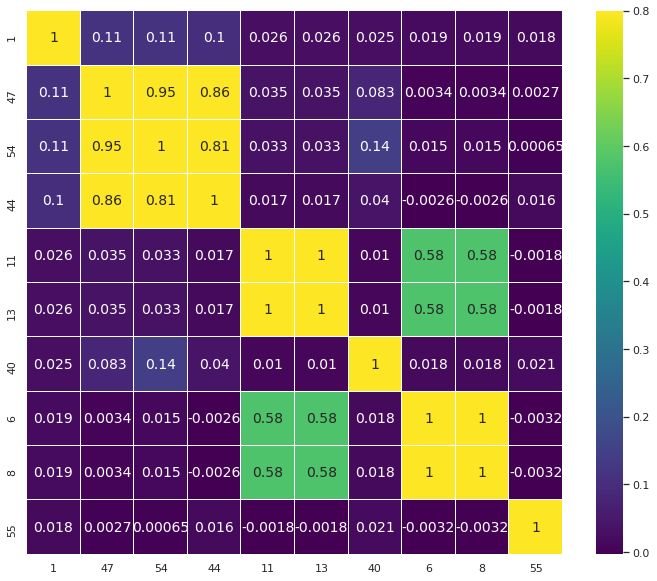

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() 
%matplotlib inline
df = dt

cols = df.corr().nlargest(10,'1')['1'].index
cm = np.corrcoef(df[cols].values.T)

plt.subplots(figsize = (12,10))
sns.heatmap(cm, vmax=.8, linewidths=0.01, annot=True, cmap='viridis',
            xticklabels=cols.values, yticklabels=cols.values, annot_kws={'size':14});

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


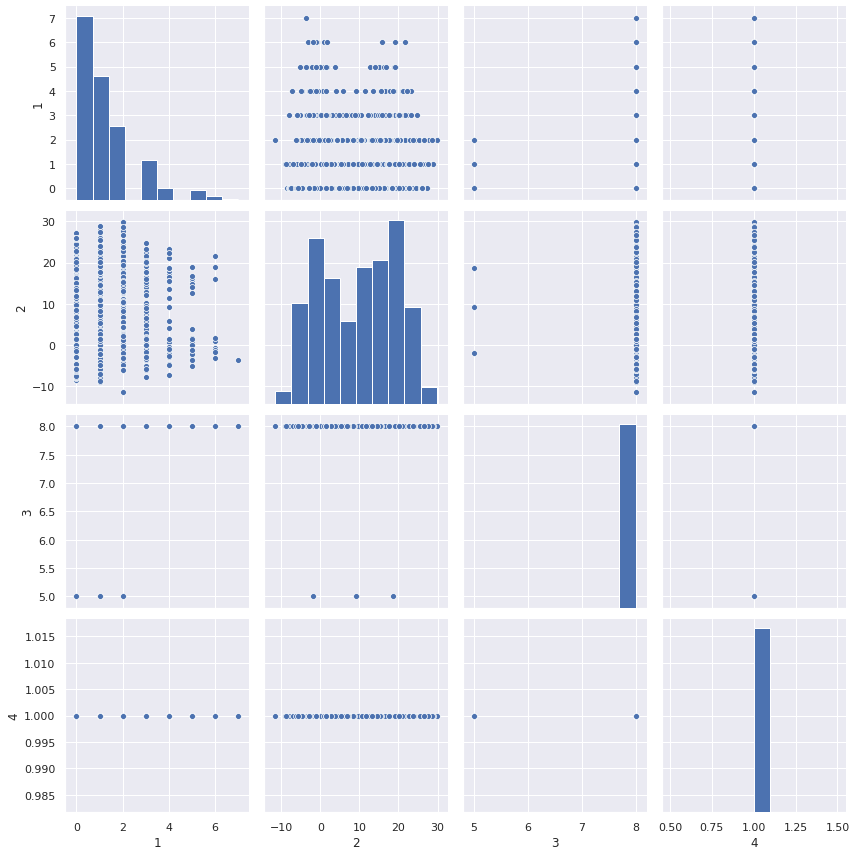

In [14]:

cols = ['1', '2', '3', '4'] #任意の列を指定、さらに増やしてもよい
sns.pairplot(df[cols], size=3)
plt.tight_layout();

------------------------------------------------------------
df.describe()
                 1            2  ...           55           57
count  1096.000000  1096.000000  ...  1096.000000  1096.000000
mean      1.145073     9.530839  ...     7.989051     7.989051
std       1.322766     9.599164  ...     0.180988     0.180988
min       0.000000   -11.500000  ...     5.000000     5.000000
25%       0.000000     0.500000  ...     8.000000     8.000000
50%       1.000000    10.250000  ...     8.000000     8.000000
75%       2.000000    17.900000  ...     8.000000     8.000000
max       7.000000    29.800000  ...     8.000000     8.000000

[8 rows x 48 columns]
------------------------------------------------------------
Create_Description_X 後の X.shape (1096, 47)
Y.shape (1096,)
------------------------------------------------------------
ここから特徴量評価------------------------------------------------------------
[1]	valid_0's l2: 1.63186
Training until validation scores don't improve for 100 rou

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[145]	valid_0's l2: 1.39303
[146]	valid_0's l2: 1.3929
[147]	valid_0's l2: 1.39393
[148]	valid_0's l2: 1.39526
[149]	valid_0's l2: 1.39536
[150]	valid_0's l2: 1.39469
[151]	valid_0's l2: 1.39712
[152]	valid_0's l2: 1.39801
[153]	valid_0's l2: 1.39754
[154]	valid_0's l2: 1.39819
[155]	valid_0's l2: 1.39728
[156]	valid_0's l2: 1.39894
[157]	valid_0's l2: 1.39977
[158]	valid_0's l2: 1.39844
[159]	valid_0's l2: 1.39953
[160]	valid_0's l2: 1.4001
[161]	valid_0's l2: 1.4003
[162]	valid_0's l2: 1.40047
[163]	valid_0's l2: 1.40066
[164]	valid_0's l2: 1.40153
[165]	valid_0's l2: 1.40295
Early stopping, best iteration is:
[65]	valid_0's l2: 1.30215
accuracy: 0.0


,importance
0,179
1,0
2,0
3,145
4,0
5,0
6,0
7,144
8,0
9,0


    importance
0          179
1            0
2            0
3          145
4            0
5            0
6            0
7          144
8            0
9            0
10           0
11          72
12           1
13           0
14           0
15          32
16           0
17           0
18           0
19           0
20           0
21          91
22           0
23           0
24           0
25         142
26           0
27           0
28         193
29           0
30           0
31           0
32           9
33           0
34           0
35           0
36         232
37           0
38           0
39         131
40           0
41           0
42           0
43           0
44          59
45           0
46           0
ここまで特徴量評価------------------------------------------------------------
light GBM
平均絶対誤差 (MAE, Mean Absolute Error
0.8822304993292716
二乗平均平方根誤差（RMSE）
1.1411171611832005
test_r2_score
0.20072621354868092


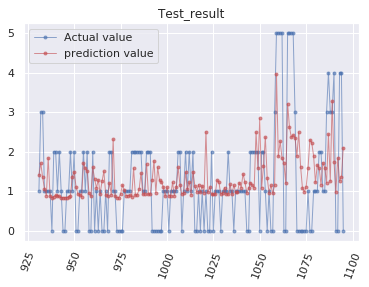

他のモデルでも評価------------------------------------------------------------
他のモデルでも評価------------------------------------------------------------
他のモデルでも評価------------------------------------------------------------
XGBoost accuracy_score
平均絶対誤差 (MAE, Mean Absolute Error
1.1757575757575758
二乗平均平方根誤差（RMSE）
1.1411171611832005
test_r2_score
-0.7558732019660008


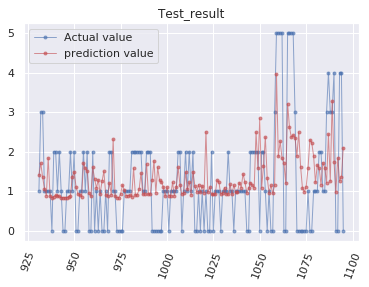

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import linear_model

from sklearn.metrics import r2_score
clf = linear_model.LinearRegression()

print("------------------------------------------------------------")

print("df.describe()")
print(df.describe())

print("------------------------------------------------------------")

#説明変数入力用
def Create_Description_X(df):

 p1 = df['1'].values
 p2 = df['2'].values
 p3 = df['3'].values
 p4 = df['4'].values
 p5 = df['5'].values
 p6 = df['6'].values
 p7 = df['7'].values
 p8 = df['8'].values
 p9 = df['9'].values
 p10 = df['10'].values
 p11 = df['11'].values
 p12 = df['12'].values
 p13 = df['13'].values
 p14 = df['14'].values
 p15 = df['15'].values
 p16 = df['16'].values
 p17 = df['17'].values
 p18 = df['18'].values
 p19 = df['19'].values
 p20 = df['20'].values
 p21 = df['21'].values
 p22 = df['22'].values
 p23 = df['23'].values
 p24 = df['24'].values
 p25 = df['25'].values
 p26 = df['26'].values
 p27 = df['27'].values
 p28 = df['28'].values
 p29 = df['29'].values
 p30 = df['30'].values
 p31 = df['31'].values
 p32 = df['32'].values
 p33 = df['33'].values
 p34 = df['34'].values
 p35 = df['35'].values
 p39 = df['39'].values
 p40 = df['40'].values
 p41 = df['41'].values
 p42 = df['42'].values
 p43 = df['43'].values
 p44 = df['44'].values
 p45 = df['45'].values
 p46 = df['46'].values
 p47 = df['47'].values
 p48 = df['48'].values
 p49 = df['49'].values
 p50 = df['50'].values
 p52 = df['52'].values
 p53 = df['53'].values
 p54 = df['54'].values
 p55 = df['55'].values
 p56 = df['56'].values
 p57 = df['57'].values

 #説明変数作成
 sika=np.array([p2,p3,p4,p5,p6,p8,p9,p10,p11,p13,p14,p15,p16,p17,p18,p19,p20,p21,p23,p24,p25,p26,p27,p28,p29,p30,p31,p32,p33,p34,p35,p39,p40,p41,p42,p43,p44,p45,p46,p47,p48,p50,p52,p53,p54,p55,p57])
 #print("sika.shape",sika.shape)
 X=sika.T
 #print("X.shape",X.shape)
 #print("X",X)
 return X

#説明変数Create_Description_X実施これでXに値が入るはず
X = Create_Description_X(df)
print("Create_Description_X 後の X.shape",X.shape)

#目的変数入力用関数
def Objective_variable_creationY(Ymoto):
 targek = Ymoto
 Y=targek.T
 return Y

#目的変数作成
targetk = df['1'].values
#目的変数作成関数利用
Y = Objective_variable_creationY(targetk)
#print("Objective_variable_creationY 後の Ye",Y)
#print("Objective_variable_creationY 後の Y.shape",Y.shape)

# 訓練用のデータと、テスト用のデータに分ける関数
def Test_data_and_training_data_split(df,X,Y):
 N_train = int(len(df) * 0.85)
 N_test = len(df) - N_train
 X_train, X_test, y_train, y_test = \
    train_test_split(X, Y, test_size=N_test, shuffle=False) 
 return X_train, X_test, y_train, y_test

# 訓練用のデータと、テスト用のデータに分ける関数実行
X_train, X_test, y_train, y_test = Test_data_and_training_data_split(df,X,Y)
print("Y.shape",Y.shape)


print("------------------------------------------------------------")

print("ここから特徴量評価------------------------------------------------------------")

#light GBM関数
def Test_lightgbm(X_train, X_test, y_train, y_test):
 import lightgbm as lgb
 # データを格納する
 lgb_train = lgb.Dataset(X_train, y_train)
 lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)
 # 学習条件を設定
 params = {'task': 'train',
          'metric':{'l2'},
          'boosting_type': 'gbdt',
          'learning_rate': 0.02,
          'num_leaves': 23,
          'min_data_in_leaf': 1,
          'num_iteration': 1000,
          'verbose': 0,
          }
 # 学習する
 model = lgb.train(params,
                  lgb_train,
                  num_boost_round=50,
                  valid_sets=lgb_eval,
                  early_stopping_rounds=100)

 # テストデータで予測する
 y_pred = model.predict(X_test, num_iteration=model.best_iteration)
 y_pred_max = np.argmax(y_pred)

 # Accuracy を計算する
 accuracy = sum(y_test == y_pred_max) / len(y_test)
 print('accuracy:', accuracy)

 # importanceを表示する
 importance = pd.DataFrame(model.feature_importance(), columns=['importance'] )
 display(importance)
 np.set_printoptions(threshold=np.inf)
 print(importance)
 # テストデータによる予測,lightgbmでX_testを予想：predictした値をY_predとする
 Y_pred = model.predict(X_test)
 return Y_pred

#Test_lightgbm関数の実施
Y_pred = Test_lightgbm(X_train, X_test, y_train, y_test)

print("ここまで特徴量評価------------------------------------------------------------")

# テスト結果を評価する,Test_result()関数
def Test_result(Y_pred, y_test):
 from sklearn.model_selection import cross_val_score
 from sklearn.linear_model import LogisticRegression
 from sklearn import svm  
 from sklearn.metrics import accuracy_score
 import lightgbm as lgb
 from sklearn.metrics import r2_score
 print("light GBM") 
 # テスト結果を評価する,accuracy_score()
 #print("予測対象X：", y_test, ", 予測結果→", Y_pred)
 from sklearn.metrics import mean_absolute_error
 print("平均絶対誤差 (MAE, Mean Absolute Error") 
 print(mean_absolute_error(y_test, Y_pred))
 ## RMSEの計算
 print("二乗平均平方根誤差（RMSE）")
 print(np.sqrt(mean_squared_error(y_test,Y_pred)))
 ## test_r2_score計算
 test_r2_score = r2_score(y_test,Y_pred)
 print("test_r2_score")
 print(test_r2_score)
 ## 予測結果をプロット
 pre_date = df.index[-len(y_test):].values
 plt.title("Test_result")
 plt.plot(pre_date, y_test, 'b', alpha=0.6, marker='.', label="Actual value", linewidth=1)
 plt.plot(pre_date, Y_pred, 'r', alpha=0.6, marker='.', label="prediction value", linewidth=1)
 plt.xticks(rotation=70)
 plt.legend()
 plt.grid(True)
 plt.show()

#Test_result関数の実施
Test_result(Y_pred, y_test)

print("他のモデルでも評価------------------------------------------------------------")


#決定木関数の作成
def sklearn_tree_test_result(X_train, X_test, y_train, y_test):
 from sklearn.tree import DecisionTreeClassifier 
 dt = DecisionTreeClassifier()
 dt.fit(X_train,y_train)
 y_pred = dt.predict(X_test)
 #print("決定木accuracy_score : {}".format(accuracy_score(y_test,y_pred)))
 print("決定木 sklearn_tree") 
 ## 平均絶対誤差の計算
 from sklearn.metrics import mean_absolute_error
 print("平均絶対誤差 (MAE, Mean Absolute Error") 
 print(mean_absolute_error(y_test, y_pred))
 ## RMSEの計算
 print("二乗平均平方根誤差（RMSE）")
 print(np.sqrt(mean_squared_error(y_test,Y_pred)))
 ## test_r2_score計算
 test_r2_score = r2_score(y_test,y_pred)
 print("test_r2_score")
 print(test_r2_score)
 ## 予測結果をプロット
 pre_date = df.index[-len(y_test):].values
 plt.title("Test_result")
 plt.plot(pre_date, y_test, 'b', alpha=0.6, marker='.', label="Actual value", linewidth=1)
 plt.plot(pre_date, Y_pred, 'r', alpha=0.6, marker='.', label="prediction value", linewidth=1)
 plt.xticks(rotation=70)
 plt.legend()
 plt.grid(True)
 plt.show()


#決定木関数の実行
#sklearn_tree_test_result(X_train, X_test, y_train, y_test)

print("他のモデルでも評価------------------------------------------------------------")
 
#ランダムフォレスト関数の作成
def RandomForestClassifier_test_result(X_train, X_test, y_train, y_test):
 from sklearn.ensemble import RandomForestClassifier
 rf = RandomForestClassifier()
 rf.fit(X_train,y_train)
 y_pred = rf.predict(X_test)
 print("RandomForestClassifier")
 ## 平均絶対誤差の計算
 from sklearn.metrics import mean_absolute_error
 print("平均絶対誤差 (MAE, Mean Absolute Error") 
 print(mean_absolute_error(y_test, y_pred))
 ## RMSEの計算
 print("二乗平均平方根誤差（RMSE）")
 print(np.sqrt(mean_squared_error(y_test,Y_pred)))
 ## test_r2_score計算
 test_r2_score = r2_score(y_test,y_pred)
 print("test_r2_score")
 print(test_r2_score)
 ## 予測結果をプロット
 pre_date = df.index[-len(y_test):].values
 plt.title("Test_result")
 plt.plot(pre_date, y_test, 'b', alpha=0.6, marker='.', label="Actual value", linewidth=1)
 plt.plot(pre_date, Y_pred, 'r', alpha=0.6, marker='.', label="prediction value", linewidth=1)
 plt.xticks(rotation=70)
 plt.legend()
 plt.grid(True)
 plt.show()

#ランダムフォレスト関数の実行
#RandomForestClassifier_test_result(X_train, X_test, y_train, y_test)

print("他のモデルでも評価------------------------------------------------------------")

#XGBoost関数の作成
def XGBoost_test_result(X_train, X_test, y_train, y_test):
 import xgboost as xgb
 from xgboost import XGBClassifier
 xgb = xgb.XGBClassifier(booster="gbtree",silent=0,seed=2019)
 xgb.fit(X_train,y_train)
 y_pred = xgb.predict(X_test)
 print("XGBoost accuracy_score")
 ## 平均絶対誤差の計算
 from sklearn.metrics import mean_absolute_error
 print("平均絶対誤差 (MAE, Mean Absolute Error") 
 print(mean_absolute_error(y_test, y_pred))
 ## RMSEの計算
 print("二乗平均平方根誤差（RMSE）")
 print(np.sqrt(mean_squared_error(y_test,Y_pred)))
 ## test_r2_score計算
 test_r2_score = r2_score(y_test,y_pred)
 print("test_r2_score")
 print(test_r2_score)
 ## 予測結果をプロット
 pre_date = df.index[-len(y_test):].values
 plt.title("Test_result")
 plt.plot(pre_date, y_test, 'b', alpha=0.6, marker='.', label="Actual value", linewidth=1)
 plt.plot(pre_date, Y_pred, 'r', alpha=0.6, marker='.', label="prediction value", linewidth=1)
 plt.xticks(rotation=70)
 plt.legend()
 plt.grid(True)
 plt.show()

XGBoost_test_result(X_train, X_test, y_train, y_test)